# Create the Envelope of a Seismogram

## Import python packages

In [4]:
%reload_ext autoreload
%autoreload 2
# Standardpakete
# Zugang zu spezifischen Funktionalitäten des Betriebssystems.
import os

# Zusatzpakete
# Grafische Darstellung von Daten.
import matplotlib as mpl
import matplotlib.pyplot as plt
# Numerisches Rechnen.
import numpy as np
# Wissenschaftliches Rechnen.
import scipy as sp
# Seismologische Datenverarbeitung
import obspy
import obspy.signal.filter
import pedalboard as pb

## Configuration

In [5]:
config = {}
config['data_dir'] = '../data'
config['fig_dir'] = '../figures'

## Load the seismogram to convert

In [6]:
# The file has been exported in script iris_data_request.
in_filename = 'seismogram_export.msd'
in_filepath = os.path.join(config['data_dir'],
                           in_filename)
st = obspy.read(in_filepath)

In [7]:
# Print the number of traces in the stream.
# It should contain one trace.
len(st)

1

In [8]:
# Print metadata of the trace.
st[0].stats

         network: IU
         station: PMG
        location: 10
         channel: BHZ
       starttime: 2024-08-08T04:42:55.219538Z
         endtime: 2024-08-08T11:42:55.194538Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 1008000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 3173, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 1624576})

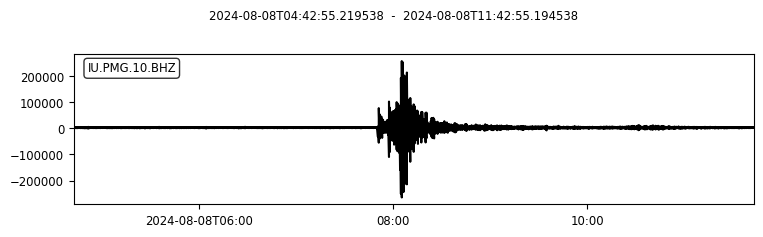

In [9]:
st.plot()
plt.show()

## Trim to selected timerange

In [10]:
trim_start = obspy.UTCDateTime('2024-08-08T07:45:00')
trim_end = trim_start + 3600

# The trim function changes the stream in place.
# Copy the original stream to keep it for later use.
st_work = st.copy()
st_work.trim(starttime = trim_start,
             endtime = trim_end)

1 Trace(s) in Stream:
IU.PMG.10.BHZ | 2024-08-08T07:44:59.994538Z - 2024-08-08T08:44:59.994538Z | 40.0 Hz, 144001 samples

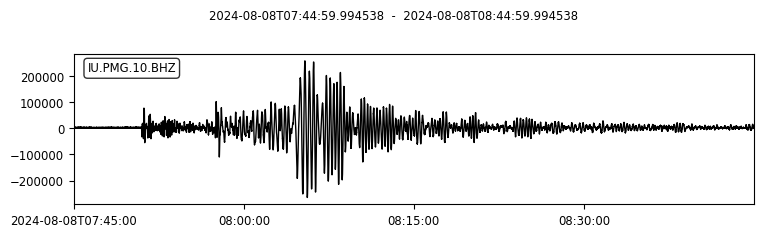

In [11]:
st_work.plot()
plt.show()

## Normalize the trace

In [12]:
st_work = st_work.normalize()

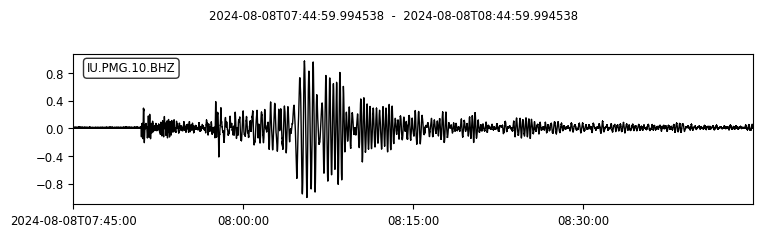

In [13]:
st_work.plot()
plt.show()

## Compute the envelope

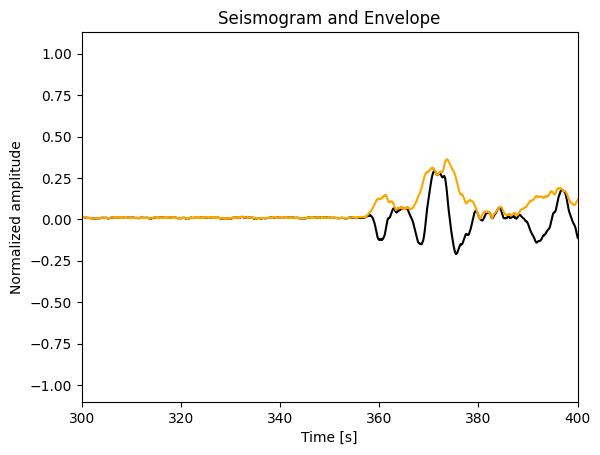

In [14]:
data = st_work[0].data
npts = st_work[0].stats.npts
sps = st_work[0].stats.sampling_rate

envelope = obspy.signal.filter.envelope(st_work[0].data)

# The plotting, plain matplotlib
t = np.arange(0, npts / sps, 1 / sps)
plt.plot(t, data, 'k')
plt.plot(t, envelope, 'orange')
plt.title('Seismogram and Envelope')
plt.ylabel('Normalized amplitude')
plt.xlabel('Time [s]')
plt.xlim(300, 400)
plt.show()

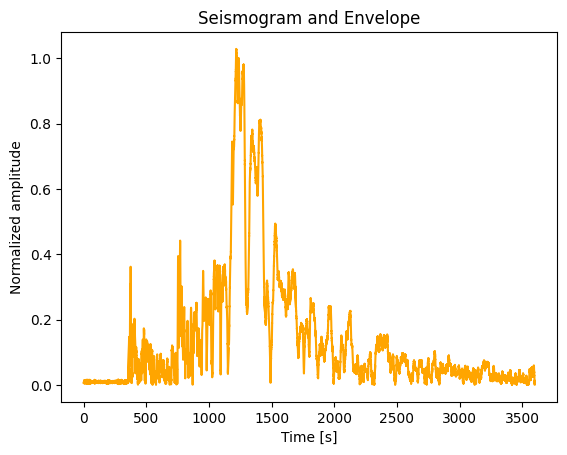

In [15]:
plt.plot(t, envelope, 'orange')
plt.title('Seismogram and Envelope')
plt.ylabel('Normalized amplitude')
plt.xlabel('Time [s]')
plt.show()

## Export the envelope

In [16]:
out_filename = 'envelope.csv'
out_filepath = os.path.join(config['data_dir'],
                            out_filename)
exp_data = np.concatenate([t[:, np.newaxis], envelope[:, np.newaxis]],
                          axis = 1)
np.savetxt(out_filepath, exp_data, delimiter = ',')